In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

First we'll calculate the empirical distribution function and a 95% confidence interval for the true distribution.

In [89]:
file_name = 'fijiquakes.dat'

In [90]:
mags = []

In [91]:
with open(file_name, 'r') as file:
    next(file)
    for line in file:
        mags.append(float(line.split()[4]))

In [92]:
data = np.array(mags)

In [93]:
data = np.sort(data)

In [94]:
n = len(data)

In [95]:
x = np.arange(3.5, 7, 0.01)

F_hat below is our empirical distribution. Let's plot it.

In [96]:
F_hat = 1/n * np.array([np.sum(data < y) for y in x])

Text(0.5, 1.0, 'Empirical distribution of earthquake magnitudes')

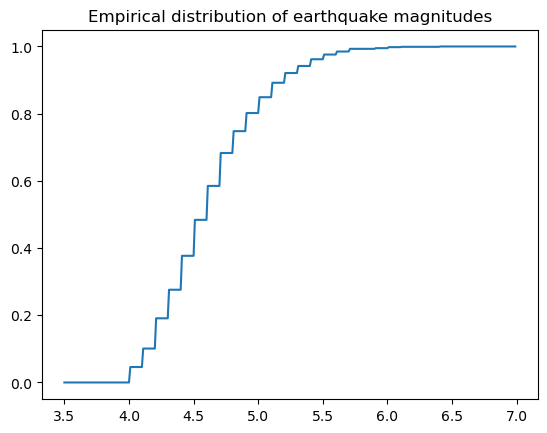

In [97]:
plt.plot(x, F_hat)
plt.title('Empirical distribution of earthquake magnitudes')

Now we'll compute and plot a confidence band using the method in the book.

In [98]:
alpha = 0.05

In [99]:
eps = np.sqrt(np.log(2/alpha)/(2*n))

In [100]:
L = np.maximum(F_hat - eps, 0)

In [101]:
U = np.minimum(F_hat + eps, 1)

Text(0.5, 1.0, '$95\\%$ confidence band for true distribution $F$')

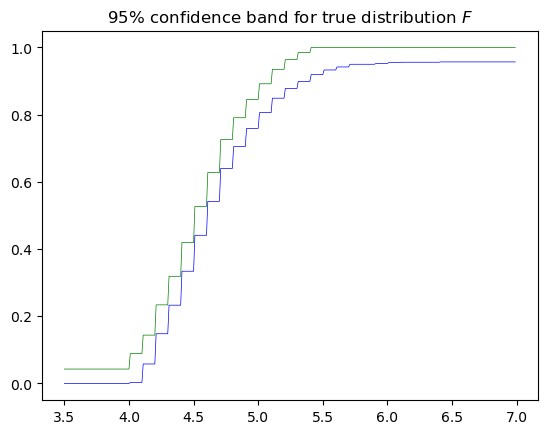

In [102]:
plt.plot(x, L, color='blue', linewidth=0.5)
plt.plot(x, U, color='green', linewidth=0.5)
plt.title('$95\%$ confidence band for true distribution $F$')

Finally let's compute a 95% confidence interval for $F(4.9)-F(4.3)$.

In [103]:
theta_hat = 1/n * (np.sum(data <= 4.9) - np.sum(data <= 4.3))

In [104]:
norm = scipy.stats.norm

In [105]:
alpha = 0.05

In [106]:
z = norm.ppf(1-alpha/2)

Here $\widehat{\text{se}}$ is calculated using Exercise 6 from the text.

In [107]:
se_hat = 1/np.sqrt(n) * np.sqrt(theta_hat - theta_hat**2)

In [108]:
lower = theta_hat - z * se_hat

In [109]:
upper = theta_hat + z * se_hat

In [110]:
print('95% confidence band for F(4.9) - F(4.3): ({0:.4f}, {1:.4f})'.format(lower, upper))

95% confidence band for F(4.9) - F(4.3): (0.4951, 0.5569)
